<a href="https://colab.research.google.com/github/avidnerd/DriverFatigueDetector/blob/main/alert_drows_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

In [ ]:
import mne
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import zipfile

for filename in os.listdir('/content/drive/MyDrive/subhi/data'):
    if filename.endswith(".zip"):
        filename = os.path.join('/content/drive/MyDrive/subhi/data', filename)
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall('/content/drive/MyDrive/subhi/data')
        os.remove(filename)


In [ ]:
pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 19.2 MB/s eta 0:00:00


Reading /content/drive/MyDrive/subhi/data/s01_051017m.set/s01_051017m.fdt
Reading /content/drive/MyDrive/subhi/data/s01_060227n.set/s01_060227n.fdt
Reading /content/drive/MyDrive/subhi/data/s01_060926_1n.set/s01_060926_1n.fdt
Reading /content/drive/MyDrive/subhi/data/s01_060926_2n.set/s01_060926_2n.fdt
Reading /content/drive/MyDrive/subhi/data/s01_061102n.set/s01_061102n.fdt
Reading /content/drive/MyDrive/subhi/data/s02_050921m.set/s02_050921m.fdt
Reading /content/drive/MyDrive/subhi/data/s02_051115m.set/s02_051115m.fdt
Reading /content/drive/MyDrive/subhi/data/s04_051130m.set/s04_051130m.fdt
Reading /content/drive/MyDrive/subhi/data/s05_051120m.set/s05_051120m.fdt
Reading /content/drive/MyDrive/subhi/data/s05_060308n.set/s05_060308n.fdt
Reading /content/drive/MyDrive/subhi/data/s05_061019m.set/s05_061019m.fdt
Reading /content/drive/MyDrive/subhi/data/s05_061101n.set/s05_061101n.fdt
Reading /content/drive/MyDrive/subhi/data/s06_051119m.set/s06_051119m.fdt
Reading /content/drive/MyDrive

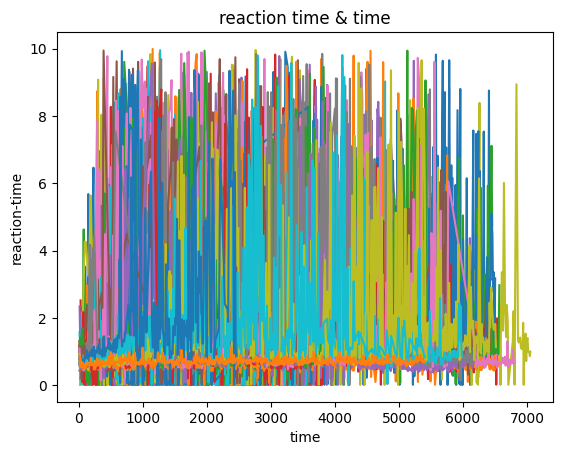

In [ ]:
# for folder in os.listdir('/content/drive/MyDrive/subhi/data'):
import mne
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
set_files = glob.glob(os.path.join('/content/drive/MyDrive/subhi/data', '*.set'))
normal_eeg = []
reaction_times = []
for set_file in set_files:
    rts = []
    tms = []
    test = set_file.split('/')[-1]
    raw = mne.io.read_raw_eeglab(os.path.join(set_file, test))
    times = raw.annotations.onset
    dev_onset = False
    response_onset = True
    response_offset = False
    baseline_start = 0.0
    baseline_end = times[0]
    for idx in range(1, len(times)):
        time = times[idx]
        if dev_onset:
            dev_onset = False
            response_onset = True
            baseline_end = time

        elif response_onset:
            response_onset = False
            response_offset = True
            reaction_time = time - baseline_end
            # print(reaction_time)
            if reaction_time < 10.0:
                normal_eeg.append(raw.copy().crop(tmin=baseline_start, tmax=baseline_start + 5))
                reaction_times.append(reaction_time)
                tms.append(time)
                rts.append(reaction_time)
        else:
            dev_onset = True
            response_offset = False
            baseline_start = time
    x = tms
    y = rts
    plt.plot(x, y)
    plt.xlabel('time')
    plt.ylabel('reaction-time')
    plt.title('reaction time & time')
    # plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


26481


In [ ]:
mean = np.mean(reaction_times)
std_dev = np.std(reaction_times)
print(mean, std_dev)
print(len(normal_eeg))

In [ ]:
alert = []
drowsy = []
threshold_drowsy = mean - 0.3 * std_dev
print(threshold_drowsy)
for i in range(len(reaction_times)):
    given_value = reaction_times[i]
    if given_value > 1.5:
        drowsy.append(normal_eeg[i])
    else:
        alert.append(normal_eeg[i])
print(len(alert), len(drowsy))

In [ ]:
import copy
raw = alert[0]
channels = raw.info['ch_names']

# raw.plot(color='blue',block=True)
# print(raw.info)
# drowsy[788].plot(block=True)
a = copy.deepcopy(alert)
b = copy.deepcopy(drowsy)
ch_names = [i for i in channels if i in ['FP1', 'FP2', 'FZ', 'F3', 'F4', 'FCZ']]
region_1_alert = [i.pick(ch_names) for i in a]
region_1_drowsy = [i.pick(ch_names) for i in b]
print(raw.info['ch_names'])
ch_2names = [i for i in channels if i in ['C4', 'T4', 'TP8', 'TP6', 'T6', 'FT7']]
a_2 = copy.deepcopy(alert)
b_2 = copy.deepcopy(drowsy)
region_2_alert = [i.pick(ch_2names) for i in a_2]
region_2_drowsy = [i.pick(ch_2names) for i in b_2]

ch_3names = [i for i in channels if i in ['C3', 'T3', 'TP7', 'TP3', 'T5', 'FT8']]

region_3_alert = [i.pick(ch_3names) for i in alert]
region_3_drowsy = [i.pick(ch_3names) for i in drowsy]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(region_1_alert[0].plot())

In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt
for raw in region_1_alert:
    sfreq = raw.info['sfreq']
    data = raw.get_data()
    freqs = np.linspace(1, 40, 100)
    n_cycles = freqs / 2.0
    data = np.reshape(data, (1, 6, 2501))
    print(data.shape)
    tfr= mne.time_frequency.tfr_array_morlet(data, sfreq=sfreq, freqs=freqs, n_cycles=n_cycles, use_fft=True)

    plt.imshow(tfr, aspect='auto', cmap='jet', origin='lower')
    plt.colorbar(label='Power Spectral Density')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('TFR Morlet - Channel 1')
    plt.show()

In [ ]:
aler1 = []
drows1 = []
aler2 = []
drows2 = []
aler3 = []
drows3 = []
for i in range(12419):
    print(i)
    aler1.append(np.array(region_1_alert[i].plot()))
    drows1.append(np.array(region_1_drowsy[i].plot()))
    # aler2.append(np.array(region_2_alert[i].plot()))
    # drows2.append(np.array(region_2_drowsy[i].plot()))
    # aler3.append(np.array(region_3_alert[i].plot()))
    # drows3.append(np.array(region_3_drowsy[i].plot()))

X = np.concatenate((aler1, drows1),axis=0)
y = np.array([0]*len(aler1)+[1]*len(drows1))
np.save('X1.npy', X)
np.save('y1.npy', y)
# X = np.concatenate((aler2, drows2),axis=0)
# y = np.array([0]*len(aler2)+[1]*len(drows2))
# np.save('X2.npy', X)
# np.save('y2.npy', y)
# X = np.concatenate((aler3, drows3),axis=0)
# y = np.array([0]*len(aler3)+[1]*len(drows3))
# np.save('X3.npy', X)
# np.save('y3.npy', y)

In [ ]:

aler = []
drows = []
aler_1 = []
drows_1 = []
for i in range(12419):
    aler.append((region_1_alert[i].copy().load_data().filter(l_freq=8, h_freq=12)).get_data())
    drows.append((region_1_drowsy[i].copy().load_data().filter(l_freq=8, h_freq=12)).get_data())
    aler_1.append((region_1_alert[i].load_data().filter(l_freq=12, h_freq=20)).get_data())
    drows_1.append((region_1_drowsy[i].load_data().filter(l_freq=12, h_freq=20)).get_data())

X = np.concatenate((aler, drows),axis=0)
y = np.array([0]*len(aler)+[1]*len(drows))
X2 = np.concatenate((aler_1, drows_1),axis=0)
y2 = np.array([0]*len(aler_1)+[1]*len(drows_1))
np.save('/content/drive/MyDrive/subhi/saved_data/X_alpha.npy', X)
np.save('/content/drive/MyDrive/subhi/saved_data/y_alpha.npy', y)
np.save('/content/drive/MyDrive/subhi/saved_data/X_beta.npy', X2)
np.save('/content/drive/MyDrive/subhi/saved_data/y_beta.npy', y2)

Streaming output truncated to the last 5000 lines.
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 551 samples (1.102 s)

Reading 0 ... 2500  =      0.000 ...     5.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 551 samples (1.102 s)

Reading 0 ... 2500  =      0.000 ...     5.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band

In [ ]:
aler = []
drows = []

for i in range(12419):
    aler.append((region_1_alert[i].copy().load_data().filter(l_freq=8, h_freq=12)).get_data())
    drows.append((region_1_drowsy[i].copy().load_data().filter(l_freq=8, h_freq=12)).get_data())

X = np.concatenate((aler, drows),axis=0)
y = np.array([0]*len(aler)+[1]*len(drows))
X2 = np.concatenate((aler_1, drows_1),axis=0)
y2 = np.array([0]*len(aler_1)+[1]*len(drows_1))
np.save('/content/drive/MyDrive/subhi/saved_data/X_alpha.npy', X)
np.save('/content/drive/MyDrive/subhi/saved_data/y_alpha.npy', y)
np.save('/content/drive/MyDrive/subhi/saved_data/X_beta.npy', X2)
np.save('/content/drive/MyDrive/subhi/saved_data/y_beta.npy', y2)

Using matplotlib as 2D backend.


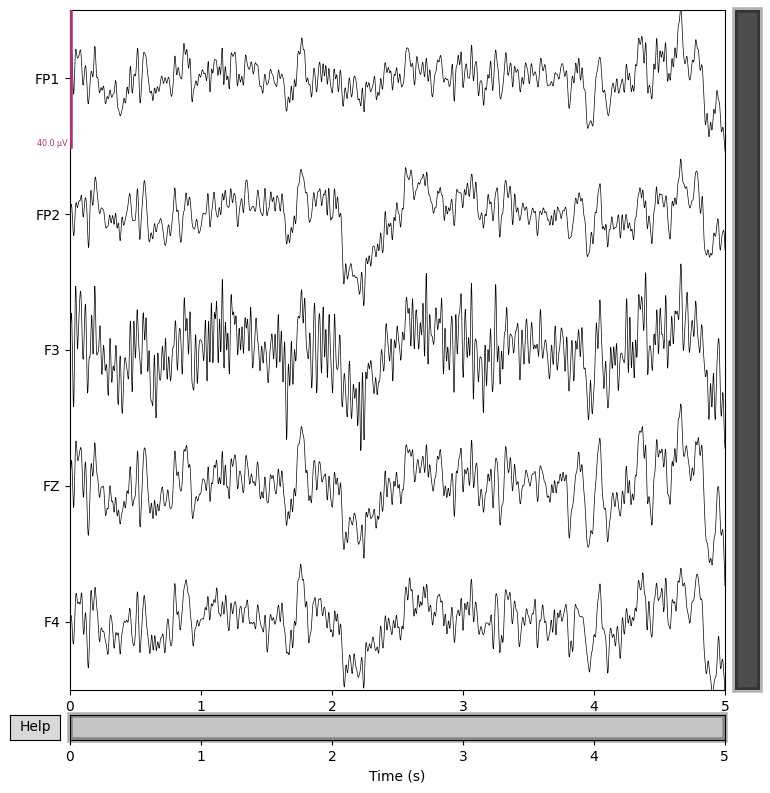

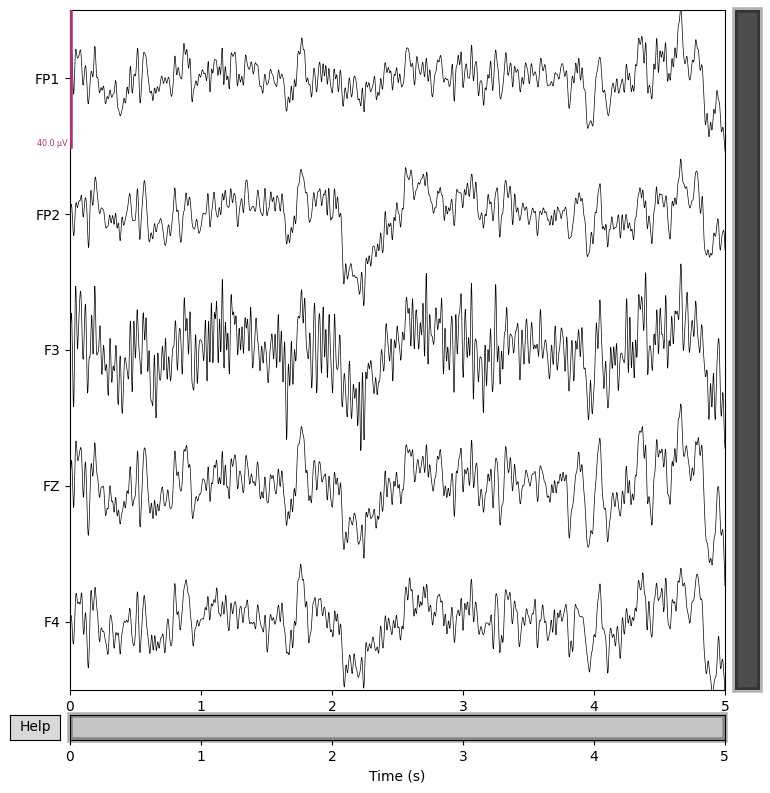

In [ ]:
region_1_alert[0].plot(block=True)

In [ ]:
aler = []
drows = []
for i in range(12419):
    print(i)
    aler.append(region_2_alert[i].get_data())
    drows.append(region_2_drowsy[i].get_data())

X = np.concatenate((aler, drows),axis=0)
y = np.array([0]*len(aler)+[1]*len(drows))
np.save('X2.npy', X)
np.save('y2.npy', y)

In [ ]:
np.save('/content/drive/MyDrive/subhi/saved_data/X2.npy', X)
np.save('/content/drive/MyDrive/subhi/saved_data/y2.npy', y)

In [ ]:
aler = []
drows = []
for i in range(12419):
    print(i)
    aler.append(region_3_alert[i].get_data())
    drows.append(region_3_drowsy[i].get_data())

X = np.concatenate((aler, drows),axis=0)
y = np.array([0]*len(aler)+[1]*len(drows))
np.save('/content/drive/MyDrive/subhi/saved_data/X3.npy', X)
np.save('/content/drive/MyDrive/subhi/saved_data/y3.npy', y)

In [ ]:
np.save('X3.npy', X)
np.save('y3.npy', y)

In [ ]:
aler = []
drows = []
for i in range(4330):
    aler.append(alert[i].get_data())
    drows.append(drowsy[i].get_data())

In [ ]:
print(aler[0].shape, aler[12].shape)

In [ ]:
extra_alert = []
extra_trans = []
for i in range(4330, 10071):
    aler.append(alert[i].get_data())
    trans.append(transitioning[i].get_data())

In [ ]:
np.save('aler.npy', aler)
np.save('trans.npy', trans)
np.save('drows.npy', drows)

In [ ]:
%whos

Variable           Type                        Data/Info
--------------------------------------------------------
aler               list                        n=4330
aler_leng          list                        n=3917
alert              list                        n=10071
baseline_end       float64                     5401.308
baseline_start     float64                     5403.332
dev_onset          bool                        True
drows              list                        n=4330
drowsy             list                        n=4330
gc                 module                      <module 'gc' (built-in)>
given_value        float64                     0.6999999999998181
glob               module                      <module 'glob' from '/usr<...>/lib/python3.10/glob.py'>
h5py               module                      <module 'h5py' from '/usr<...>ckages/h5py/__init__.py'>
hf                 File                        <Closed HDF5 file>
i                  int                   

In [ ]:
import gc
del set_files
gc.collect()

265

In [ ]:
%whos

In [ ]:
aler = []
drows = []
trans = []
with open(r'/content/drive/MyDrive/subhi/saved_data/aler.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        aler.append(x)

with open(r'/content/drive/MyDrive/subhi/saved_data/drows.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        drows.append(x)

with open(r'/content/drive/MyDrive/subhi/saved_data/trans.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        trans.append(x)

In [ ]:
print(drows)

In [ ]:
# comb = drows + aler + trans
# max_length = max(sub_array.shape[1] for sub_array in comb)
# print(max_length)
aler_leng = [sub_array.shape[1] for sub_array in aler]
print(max(aler_leng))
aler.pop(aler_leng.index(max(aler_leng)))
aler_leng.pop(aler_leng.index(max(aler_leng)))
print(max(aler_leng))
# trans_leng = max(sub_array.shape[1] for sub_array in trans)
# print(trans_leng)
# drows_leng = max(sub_array.shape[1] for sub_array in drows)
# print(drows_leng)

In [ ]:
x = [sub_array.shape[1] for sub_array in trans]
print(len(trans[x.index(min(x))][1]))

In [ ]:
comb = drows + aler + trans
max_length = max(sub_array.shape[1] for sub_array in comb)
print(max_length)
print(drows[0].shape)
print(len(drows[0][1]))

def zero_padding(length):
    new_drows = []
    new_aler = []
    new_trans = []
    for i in range(length):
        zero_needed = max_length - len(drows[i][1])
        print(zero_needed)
        n_r = np.ndarray((30, max_length))
        for j in range(30):
            arr = np.concatenate((np.zeros(zero_needed), drows[i][j]))
            print(arr)
            print(arr.shape)
            n_r[j] = arr
        new_drows.append(n_r)

        n_r = np.ndarray((30, max_length))
        zero_needed = max_length - aler[i].shape[1]
        for j in range(30):
            arr = np.concatenate((np.zeros(zero_needed), aler[i][j]))
            n_r[j] = arr

        new_aler.append(n_r)

        n_r = np.ndarray((30, max_length))
        zero_needed = max_length - trans[i].shape[1]
        for j in range(30):
            arr = np.concatenate((np.zeros(zero_needed), trans[i][j]))
            n_r[j] = arr

        new_trans.append(n_r)

In [ ]:
import gc
print(trans)
# gc.collect()

In [ ]:
drows = np.array(drows)
num_samples = len(drows[0][0])
num_imfs = 0
num_frames = drows.shape[0]
num_channels = drows.shape[1]

for i in range(num_frames):
    for j in range(num_channels):
        item_imf = np.array(drows[i, j])
        if num_imfs < item_imf.shape[1]:
            num_imfs = item_imf.shape[1]

data_trans = np.zeros([num_samples, num_imfs, num_frames, num_channels])
for i in range(num_frames):
    for j in range(num_channels):
        item_imf = np.array(drows[i, j])
        data_trans[:, :item_imf.shape[1], i, j] = item_imf

drows = data_trans

set_real_FRMs_idx = [0, 1, 2, 3, 4]
num_arti_FRMs = 10000
set_real_IMFs = drows
set_real_IMFs_idx = [0, 1, 2]


def create_artifical_frame(set_real_FRMs_idx, num_arti_FRMs, set_real_IMFs, set_real_IMFs_idx):
    num_samples, num_channels = set_real_IMFs.shape[0], set_real_IMFs.shape[-1]

    arti_FRMs = np.zeros([num_arti_FRMs, num_samples, num_channels])
    for idx_FRM in range(num_arti_FRMs):
        max_arti_IMFs = len(set_real_IMFs_idx)
        item_FRM_IMFs = np.zeros([num_samples, max_arti_IMFs, num_channels])

        seq_FRMs_idx = []
        while(len(seq_FRMs_idx) < max_arti_IMFs):
            seq_FRMs_idx.extend(np.random.permutation(len(set_real_FRMs_idx)))

        seq_FRMs_idx = [int(item) for item in seq_FRMs_idx]

        seq_FRMs_idx = seq_FRMs_idx[:max_arti_IMFs]

        for idx_IMF in range(max_arti_IMFs):
            for idx_channel in range(num_channels):
                idx_IMF_real = set_real_IMFs_idx[idx_IMF]
                idx_FRM_real = set_real_FRMs_idx[seq_FRMs_idx[idx_IMF]]
                selected_IMF = set_real_IMFs[:,
                                             idx_IMF_real, idx_FRM_real, idx_channel]
                item_FRM_IMFs[:, idx_IMF, idx_channel] = selected_IMF

        arti_FRMs[idx_FRM, :, :] = np.sum(item_FRM_IMFs, 1)
    return arti_FRMs

arti_frames = create_artifical_frame(set_real_FRMs_idx,
                                    num_arti_FRMs,
                                    set_real_IMFs,
                                    set_real_IMFs_idx)



In [ ]:
import os
import mne


def bandpass_filter_fif_files(directory):
  os.makedirs(os.path.join(directory, 'theta'), exist_ok=True)
  os.makedirs(os.path.join(directory, 'alpha'), exist_ok=True)
  os.makedirs(os.path.join(directory, 'beta'), exist_ok=True)

  theta_band = (4, 8)
  alpha_band = (8, 13)
  beta_band = (13, 30)

  for filename in os.listdir(directory):
      if filename.endswith('.fif'):
          raw = mne.io.read_raw_fif(os.path.join(directory, filename), preload=True)

          raw_theta = raw.copy().filter(l_freq=theta_band[0], h_freq=theta_band[1])
          raw_alpha = raw.copy().filter(l_freq=alpha_band[0], h_freq=alpha_band[1])
          raw_beta = raw.copy().filter(l_freq=beta_band[0], h_freq=beta_band[1])

          theta_filename = os.path.join(directory, 'theta', f'{filename}_theta.fif')
          alpha_filename = os.path.join(directory, 'alpha', f'{filename}_alpha.fif')
          beta_filename = os.path.join(directory, 'beta', f'{filename}_beta.fif')
          raw_theta.save(theta_filename)
          raw_alpha.save(alpha_filename)
          raw_beta.save(beta_filename)


In [ ]:
alert_data = np.array(aler, dtype=object)
transitioning_data = np.array(trans, dtype=object)
drowsy_data = np.array(drows, dtype=object)
X = np.concatenate((alert_data, transitioning_data, drowsy_data), axis=0)
print(X.shape)
y = np.array([0]*len(aler) + [1]*len(trans) + [2]*len(drows))
print(y)
# np.save('X.npy', X, allow_pickle=True)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train)
print(type(X_train))

In [ ]:
import numpy as np
X = np.load('/content/drive/MyDrive/subhi/Kessler/X.npy', allow_pickle=True)


In [ ]:
import os
alert_alpha_dir = '/content/drive/MyDrive/subhi/Kessler/raw_data/raw_alert/alpha'
drowsy_alpha_dir = '/content/drive/MyDrive/subhi/Kessler/raw_data/raw_drowsy/alpha'
ale = len(os.listdir(alert_alpha_dir))
drow = len(os.listdir(drowsy_alpha_dir))
print(len(X))
diff = (ale + drow) - len(X)
y = np.array([0]* (ale - diff//2) + [1] * (drow - diff//2 - 1))
print(y)


In [ ]:
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from keras.models import Sequential
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, LSTM, Dense

# Define the CNN part of the model
cnn = Sequential()
cnn.add(TimeDistributed(Conv2D(32, (1, 3), activation='relu', input_shape=(None,len(X_train), 151, 30, 1))))
cnn.add(TimeDistributed(Conv2D(32, (1, 3), activation='relu')))
cnn.add(TimeDistributed(MaxPooling2D((1, 2))))

cnn.add(TimeDistributed(Conv2D(32, (1, 3), activation='relu')))
cnn.add(TimeDistributed(Conv2D(32, (1, 3), activation='relu')))
cnn.add(TimeDistributed(MaxPooling2D((1, 2))))

cnn.add(TimeDistributed(Flatten()))

model = Sequential()
model.add(cnn)
model.add(LSTM(32, return_sequences=False))
model.add(Dense(2, activation='softmax'))

model.build(input_shape=(None, len(X_train), 151, 30, 1))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()




In [ ]:
import tensorflow
print(type(X_train))
arr = [i for i in X_train]
arr2 = []
for e in arr:
    arr2.append(e.shape)

min_epoch = min(arr2, key=lambda x:x[0])
print(min_epoch)
print(len(min_epoch))
for i in range(len(X_train)):
    curr = X_train[i]
    X_train[i][0] = X_train[i][0][:min_epoch]
    print(curr.shape)

In [ ]:
model.fit(X_train, y_train, epochs=4, batch_size=64)